In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas_datareader.data as web

In [4]:
import datetime

In [5]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
import datetime

In [7]:
import pandas_datareader as web 

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']

print(btc.head())

Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [8]:
btc.to_csv("btc.csv")

In [9]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date       BTC-USD
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


In [10]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [11]:
del btc['Date']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [15]:
pip install seaborn


     -------------------------------------- 288.2/288.2 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

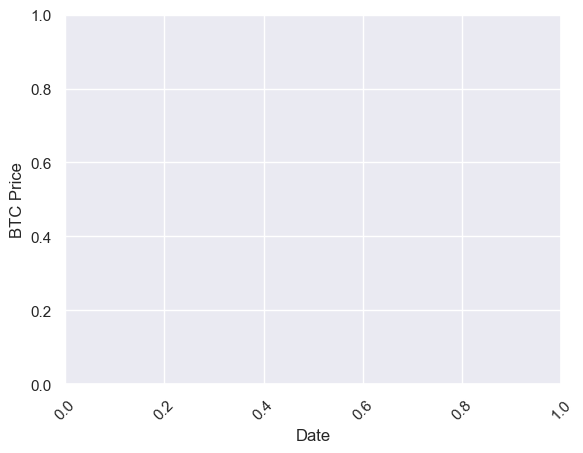

In [18]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

In [19]:
plt.plot(btc.index, btc['BTC-USD'], )

In [20]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ModuleNotFoundError: No module named 'statsmodels'

In [22]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
y = train['BTC-USD']

In [25]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
ARMAmodel = ARMAmodel.fit()

In [27]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

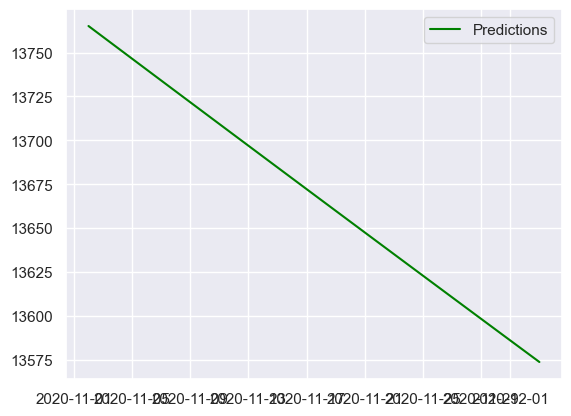

In [28]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

ModuleNotFoundError: No module named 'sklearn'

In [30]:
pip install sklearn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

ModuleNotFoundError: No module named 'sklearn'

In [1]:
from statsmodels.tsa.arima.model import ARIMA

In [2]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

NameError: name 'y' is not defined

In [3]:
import pandas_datareader.data as web
import datetime

In [4]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
import datetime

In [6]:
import pandas_datareader as web 

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']

print(btc.head())

Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [7]:
btc.to_csv("btc.csv")

In [8]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date       BTC-USD
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


In [9]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [10]:
del btc['Date']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

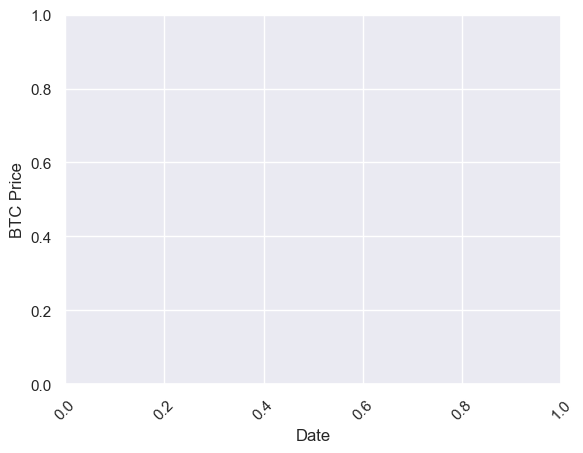

In [12]:
sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

In [13]:
plt.plot(btc.index, btc['BTC-USD'], )

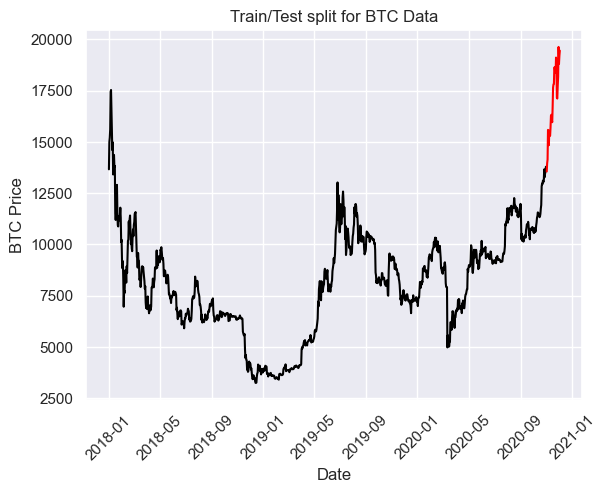

In [14]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
y = train['BTC-USD']

In [17]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
ARMAmodel = ARMAmodel.fit()

In [19]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

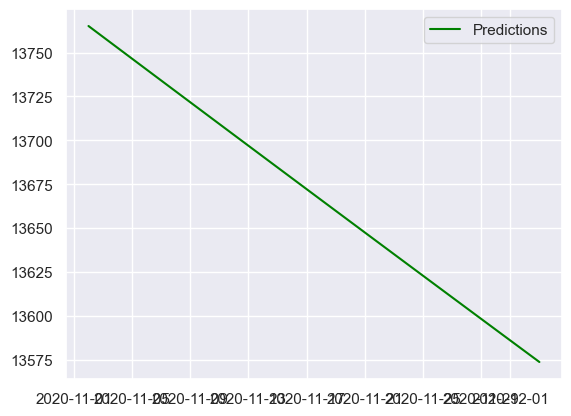

In [20]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

ModuleNotFoundError: No module named 'sklearn'

In [22]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

ModuleNotFoundError: No module named 'sklearn'

In [24]:
pip install scikit-learn

     ---------------------------------------- 7.5/7.5 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3736.3890265258765


In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE:  3588.2559686064246


D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Code\sovkom\financial-app\ml\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


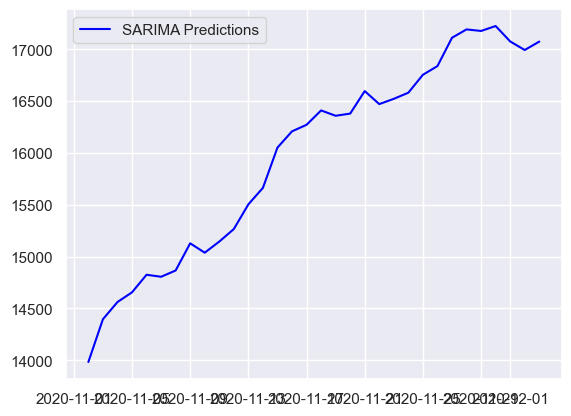

In [28]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()